

<h1> <span style="color:yellow"> IT'S NOT CLEAR CODE BECAUSE I'M DIRTY MAN.</span> </h1>
<p align="center" >
<img src="https://i.pinimg.com/originals/78/8f/27/788f27edb761cb3e6af9422ece19fcc4.jpg" width="30%" >
</p>


In [4]:
import numpy as np
import numpy

### 1. Write a python program to calculate the area of a triangle given 3 sides (8, 6 and 10). 
#### Heron's Formula for the area of a triangle

$$
area = \sqrt{p(p−a)(p-b)(p-c)}
$$
  
$$
p = \frac{a+b+c}{2}
$$


In [5]:
a = 8
b = 6
c = 10
p = (a+b+c)/2
area = np.sqrt(p*(p-a)*(p-b)*(p-c))
print(area)

24.0


### 2.Write a python program to flip a coin 1000 times and count the number of heads. 

In [6]:
#numpy.random.randint(low, high=None, size=None, dtype='l')
rand = np.random.randint(2,size=1000)
count = 0
for i in rand:
    if i == 1: count += 1
print('head: {} \ntails: {}'.format(count,1000-count))


head: 518 
tails: 482


### 3.Write a python program to round the value of Pi to 5 decimal digits. 
#### Taylor Series
$$
\pi = 4 \times \sum_{n=1}^{\infty} \frac{(-1)^{n}}{2n+1}
$$

In [7]:
es = 0.5*pow(10, 2-5)
ea = 100
i = 0
sum = 0
prev_sum = 0
while ea > es:
    sum = sum + ((-1)**i) / ((2*i)+1)
    ea = abs((sum-prev_sum)/sum)*100
    prev_sum = sum
    #print('interval:{} appoximate_error:{} sum:{}'.format(i,ea,sum))
    i += 1
# end while
print(sum*4)

3.1416005075068716


### 4. Write a python program to convert a number in base 10 to base 2 (including number n with |n| < 1) and vice versa. 


In [8]:
def dec_bin(dec):
    if type(dec) == int:
        result = convert_int_bin(dec)
    else:
        result = convert_float_bin(dec)
    print(result)


def convert_int_bin(dec):
    if dec == 0:
        return '0'
    int_bin = ''
    while dec != 0:
        int_bin += str(dec%2)
        dec = dec//2
    # end while
    return int_bin[::-1]


def convert_float_bin(dec):
    # convert to string
    dec = str(dec)
    dec = dec.split('.')
    # call another function to convert integer part to binary.
    int_part = convert_int_bin(int(dec[0]))
    # convert string to float.
    flo_part = float('0.'+dec[1])
    size = len(str(flo_part))-2
    i = 0
    # check repeat number.
    check = flo_part
    flo_bin = ''
    while i < 32:
        flo_part = flo_part*2
        flo_bin += str(int(flo_part//1))
        flo_part = flo_part%1
        i+=1
        # repeat number then stop
        if check == round(flo_part,size):
            break
    # end while
    # return full part of binary.
    return int_part+'.'+flo_bin

In [9]:
dec_bin(0.36)


0.01011100001010001111


In [10]:
def bin_dec(bin):
    if type(bin) == int:
        result = convert_bin_int(bin)
    else:
        result = convert_bin_float(bin)
    print(result)
    

def convert_bin_int(bin):
    if bin == 0:
        return '0'
    bin = str(bin)
    size = len(bin)-1
    dec = 0
    for i in bin:
        if i == '1':
            dec += 2**size
        size -= 1
    return int(dec)

def convert_bin_float(bin):
    bin = str(bin)
    bin = bin.split('.')
    int_part, flo_part = bin[0], bin[1]
    int_part = convert_bin_int(bin[0])
    size = -1
    flo = 0
    for i in flo_part:
        if i == '1':
            flo += 2**size
        size -=1 
    return int_part + float(flo)


In [11]:
bin_dec(1001.001)

9.125


### 5. Write a python program to convert a number in base 10 to IEEE-754 32 bits: input is a number in base 10 and output is a list of 3 numbers: sign, exponent and fraction. 
<p align="center">
<img src="https://media.geeksforgeeks.org/wp-content/uploads/Single-Precision-IEEE-754-Floating-Point-Standard.jpg" width="50%" >


In [12]:
def dec_to_ieee(N):
    print('Decimal :',N)
    sign = float(N)
    
    # split in integer part and float part.
    temp = N.split('.')
    
    # step2: Calculate integer part to binary
    Integer = ''
    N = temp[0]
    # step1: Convert string to positive integer.
    N = abs(int(N)) 
    if(N != 0):
        while N > 0:
            remainder = N % 2
            N = N // 2
            Integer += str(remainder)
        # end while
    else:
        Integer = '0'
    # Reverse the binary
    Integer = Integer[::-1]
    # End calculate integer part to binary

    # step3: Calculate floating part
    y = temp[1]
    length = len(y)
    # Convert string to floating-point
    y = float(y) / (10**length)
    Float = ''
    for i in range(0, 28):
        y = y * 2
        Float += str(int(y // 1))
        y = y % 1
    # end for
    # End calculate floating part

    #step4: Summarizing - the positive number before normalization:
    result = Integer + Float
    counter = 0
    
    # step5: Calulate exponent to binary.
    # Normalize the binary representation of the number..
    # find one non-zero digit stays to the left of the decimal point.
    # use counter to count the one non-zero left most
    # 1 1001.0101 1000 1101 0100 1111 1101(2) × 2^0
    # 1.1001 0101 1000 1101 0100 1111 1101(2) × 2^4 (exponent = 4)
    for i in result:
        counter += 1
        if i == '1':
            break
    # end for
    # shift to the right.
    if(counter > len(Integer)+1):
        exponent = len(Integer) - counter
    # shift to the left.
    else:
        exponent = counter - len(Integer)
        exponent = abs(exponent)
    # adjusted exponent by + 127
    exponent = exponent + 127
    # Convert exponent to binary
    bin_exponent = ''
    while exponent > 0:
        remainder = exponent % 2
        exponent = exponent // 2
        bin_exponent += str(remainder)
    # End calculate exponent to binary

    print('Sign :', '0' if sign >= 0 else '1')
    print('Exponent :', bin_exponent[::-1].zfill(8))
    # Normalize the mantissa(fraction), remove the leading (leftmost) bit,
    # since it's allways '1' (and the decimal point) and adjust
    # its length to 23 bits, by removing the excess bits from
    # the right (losing precision...):
    fraction = result[counter::]
    print('Fraction :', fraction[0:23])
    if sign >= 0:
    	IEEE = '0-'
    else:
    	IEEE = '1-'
    return IEEE + bin_exponent[::-1].zfill(8) + '-' + fraction[0:23]

In [13]:
dec_to_ieee('25.347')

Decimal : 25.347
Sign : 0
Exponent : 10000011
Fraction : 10010101100011010100111


'0-10000011-10010101100011010100111'

### 6. We know that $tan(\frac{\pi}{4}) = 1 $. Use the following Taylor series expansion for arctan to evaluate the value of 𝜋 for up to 6 significant digits. 
$$
\arctan(x) = \sum_{n=1}^{\infty} (-1)^{n+1}\frac{x^{2n-1}}{2n-1}
$$

$
\arctan(1) = 1 - \frac{1^{3}}{3} + \frac{1^{5}}{5} - \frac{1^{7}}{5} + ... = \frac{\pi}{4}
$

$
\pi = 4\times  \sum_{n=1}^{\infty} \frac{(-1)^{n}}{2n+1}
$

In [14]:
es = 0.5*pow(10, 2-6)
ea = 100
n = 1
prev = 0
x = 1
n = 1
s = 0
while ea > es :
    p = (2*n)-1
    y = ((x**p)/p)*((-1)**(n+1))
    s+= y
    ea = abs((s-prev)/s)*100
    prev = s
    n+=1
print(s*4)

3.14159343898711


In [15]:
import matplotlib.pyplot as plt


###  7. For function $ f(x) = e^{-x} - ln(x) $ 
a. Plot 𝑓(𝑥)  
b. Solve 𝑓(𝑥) = 0 using eye-balling methods, interval search, Newton-Raphson,bisection and false position.

In [16]:
def f(x):
    return np.e**-x -np.log(x)

In [17]:
def df(x):
    return (-1) * ((np.e**(-x) * x+1)/x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]


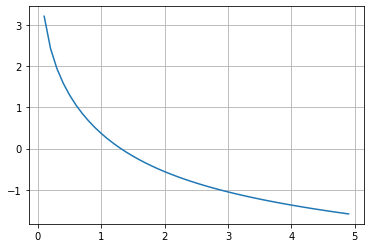

In [18]:
# Prepare the data
x = np.arange(0,5,0.1)
print(x)
y = f(x)
# Plot the data
plt.plot(x, y)
plt.grid()
# Show the plot
plt.show()

In [19]:
def interval_search(l, u, n):
    xr = 1
    es = 0.5*pow(10, 2-4)
    prev_xr = 0
    ea = 100
    while ea > es:
        x = numpy.linspace(l, u, n)
        for i in range(n-1):
            xl = x[i]
            xu = x[i+1]
            if f(xl) * f(xu) < 0:
                xr = (xl+xu)/2
                # print('found root in ({},{}) = {}'.format(xl, xu, xr))
                l = xl
                u = xu
                break
        ea = abs((xr-prev_xr)/xr) * 100
        prev_xr = xr
        # print('approxmate error =',ea)
    print('found root in [{},{}] xr = {}'.format(xl, xu, xr))
    print('approxmate error =',ea)


In [20]:
def bisection(l, u):
    xl = l
    xu = u
    xr = 0
    es = 0.5*pow(10, 2-4)
    prev_xr = 0
    ea = 100
    while ea > es:
        mid = (xl+xu)/2
        if f(xl)*f(mid) < 0:
            xu = mid
        else:
            xl = mid
        xr = (xl+xu)/2
        # print('found root in ({},{}) = {}'.format(xl, xu, xr))
           
        ea = abs((xr-prev_xr)/xr) * 100
        prev_xr = xr
        # print('approxmate error =',ea)
    print('found root in [{},{}] xr = {}'.format(xl, xu, xr))
    print('approxmate error =',ea)
    return xr

In [21]:
def false_position(l, u):
    xl = l
    xu = u
    xr = 0
    es = 0.5*pow(10, 2-4)
    prev_xr = 0
    ea = 100
    while ea > es:
        # another fomula
        # xr = xl -(xu-xl) * f(xl)/(f(xu) - f(xl))
        xr = xu - f(xu) * ( (xu - xl) / ( f(xu) - f(xl) ) )
        if f(xl)*f(xr) < 0:
            xu = xr
        else:
            xl = xr
        # print('found root in ({},{}) = {}'.format(xl, xu, xr))
        ea = abs((xr-prev_xr)/xr) * 100
        prev_xr = xr
        # print('approxmate error =',ea)
    print('found root in [{},{}] xr = {}'.format(xl, xu, xr))
    print('approxmate error =',ea)

In [22]:
def newton(f,df,x0,p):
    es = 0.5 *(10**(2-p))
    x = prev_x = float(x0)
    i = 0
    ea = 100
    while ea > es:
        x = x - (f(x)/df(x))
        ea = abs((x-prev_x)/x) * 100
        prev_x = x
        i += 1
    print('found root x = {}'.format(x))
    print('approxmate error =',ea)

In [23]:
print('Interval search:')
interval_search(1,2,11)
print('Bisection:')
bisection(1, 2)
print('False position:')
false_position(2, 3)
print('Newton:')
newton(f,df,0.1,4)

Interval search:
found root in [1.30979,1.3098] xr = 1.309795
approxmate error = 0.0034356521440264097
Bisection:
found root in [1.3096923828125,1.309814453125] xr = 1.30975341796875
approxmate error = 0.004660049396523603
False position:
found root in [1.3098052531339606,0.8639577151564173] xr = 1.3098052531339606
approxmate error = 0.0018628166779356367
Newton:
found root x = 1.3097995858021254
approxmate error = 0.00016913260022364605


### 8. For function $f(x) = x^2 -ln(x) - 5$
a. Find minimum using calculus, equal interval search, golden section search, parabolic
interpolation


b. Solve 𝑓(𝑥) = 0 using eye-balling methods, interval search, Newton-Raphson,
bisection and false position. 

In [24]:
def f(x):
    return x**2-np.log(x)-5

In [25]:
def df(x):
    return 2*x - (1/x)

In [26]:
def min_interval(f,a,b,p):
    ep = 0.1
    ea = 100
    es = 0.5 * 10**(2-p)
    px = b
    while ea > es:
        l = (a+b)/2 + ep/2
        u = (a+b)/2 - ep/2
        if f(l) > f(u):
            b = l
        else:
            a = u
        xmax = (a+b)/2
        ea = abs((xmax - px)/xmax) * 100
        px = xmax
    print('({},{}) xmin = {} ea = {}'.format(a,b,xmax,ea))

In [27]:
def min_goldensearch(f,xL,xU,p):
    phi = (1+numpy.sqrt(5))/2 
    ea = 100
    es = 0.5 * 10**(2-p)
    while ea > es:
        d = (phi - 1)*(xU-xL)
        x1 = xL+d
        x2 = xU-d
        if f(x1) > f(x2):
            xmin = x2
            xU = x1
        else:
            xmin = x1
            xL = x2
        ea = (2-phi)*abs((xU-xL)/xmin)*100
    print('({},{}) xmin = {} ea = {}'.format(xL,xU,xmin,ea))


In [28]:
def min_parabolic(f,x1,x2,x3,p):
    ea = 100
    es = 0.5 * 10**(2-p)
    px = x3
    
    while ea > es:
        
        alpha1 = (x2-x1)*(x2-x1)*(f(x2)-f(x3));
        alpha2 = (x2-x3)*(x2-x3)*(f(x2)-f(x1));
        beta1 = (x2-x1)*(f(x2)-f(x3));
        beta2 = (x2-x3)*(f(x2)-f(x1));
        
        gamma = (alpha1 - alpha2)/(beta1 - beta2);
        x4 = x2 - (0.5 * gamma);
        if x4  > x2:
            x1 = x2
            x2 = x4 
        else:
            x3 = x2
            x2 = x4
        xopt = x4 
        ea = abs((xopt - px)/xopt) * 100
        px = xopt
        # print(x1,x2,x3,x4)
    print('({},{}) xmin = {} ea = {}'.format(x1,x2,xopt,ea))

In [29]:
min_interval(f,0.5,1.0,4)

(0.6576660156249998,0.75771484375) xmin = 0.7076904296875 ea = 0.0034498223341623423


In [30]:
min_goldensearch(f,0.5,1.0,4)

(0.707071172864907,0.7071577080007632) xmin = 0.707104226345583 ea = 0.004674484954899666


In [31]:
min_parabolic(f,0.5,0.6,1.0,4)

(0.6,0.7071122195936155) xmin = 0.7071122195936155 ea = 0.0020673048263764107


In [32]:
print('Interval search:')
interval_search(2.3,2.5,11)
print('Bisection:')
bisection(2, 3)
print('False position:')
false_position(2, 3)
print('Newton:')
newton(f,df,2.3,4)

Interval search:
found root in [2.4261600000000003,2.42618] xr = 2.42617
approxmate error = 0.0028852059006588366
Bisection:
found root in [2.4261474609375,2.42626953125] xr = 2.42620849609375
approxmate error = 0.002515659983396644
False position:
found root in [2.426160029809453,3] xr = 2.426160029809453
approxmate error = 0.003832563364382484
Newton:
found root x = 2.4261729308291877
approxmate error = 0.00017479091813871558


### 9. Matrix 
 a. Use python to test whether a matrix is a zero matrix, symmetric matrix, identity
matrix, upper triangular matrix.

b. Use python to find determinant minor, cofactor, adjoint and inverse of a matrix. 

In [33]:
def is_square(a):
    # use numpy library
    rows, colums = a.shape
    if rows == colums:
        return True
    else:
        return False


def is_symmetrical(a):
    if is_square(a):
        rows, colums = a.shape
        for i in range(0, rows):
            for j in range(0, colums):
                # it's not symmectric
                if not a[i, j] == a[j, i]:
                    return False
                # end if
            # end for
        # end for
        return True
    else:
        return False


def is_identity(a):
    if is_diagonal(a):
        rows, colums = a.shape
        for i in range(0, rows):
            for j in range(0, colums):
                if (a[i, j] != 1 and i == j):
                    print(i, j)
                    return False
                # end if
            # end for
        # end for
        return True
    else:
        return False


def is_zero(a):
    rows, colums = a.shape
    for i in range(0, rows):
        for j in range(0, colums):
            if a[i, j] != 0:
                return False
            # end if
        # end for
    # end for
    return True


def is_upper_triangle(a):
    if not is_square(a):
        return False
    r,c = a.shape
    for i in range(1,r):
        for j in range(0,i):
            if a[i,j] != 0:
                return False
            # end if
        #end for
    #end for
                
    return True

In [34]:
a = np.matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
b = np.matrix([
    [1,2,4,2],
    [0,1,7,3],
    [0,0,2,1],
    [0,0,0,1]
])

# KEEP IN MIND THOSE CODE USEING ARRAY NOT MATRIX

In [35]:
# find determinate for NxN useing recursion
def det(a):
    d = 0
    if len(a) == 1 :return a[0][0]
    else:
        for c in range(0,len(a)):
            temp = minor(a, 0, c)
            d = d + (-1)**c * a[0][c] * det(temp)
        # end loop
        return d

# minor(a,r,c) just use to find minor of n-1 x n-1
# return in array
def minor(a, r, c):
    l = len(a)
    temp = []
    # run loop through colum 
    for j in range(l):
            temp2 = []
            # run loop through row
            for i in range(len(a[0])):
                # cut the row and colum to get minor
                if  j != c and i != r :
                    temp2.append(a[i][j])
                # end if
            # end for j
            # if temp2 is not empty
            if temp2:
                temp.append(temp2)
        #end if
    #end for i
    return temp   
# find complete minor.
def find_minor(a):
    # normaly we have to check square matrix first.
    m = []
    for i in range(len(a)):
        for j in range(len(a)):
            # find det of small minor
            x = det(minor(a,i,j))
            m.append(x)
        # end j loop
    # end i loop
    # return in 2d matrix.
    return numpy.array(m).reshape(len(a),len(a))

# find cofactor from complete minor
def cofactor(a):
    a = find_minor(a)
    for i in range(len(a)):
       for j in range(len(a)):
           a[i][j] = (-1)**(i+j) * a[i][j]
       # end j loop
    # end i loop
    return a
def transpose(a):
    rows, colums = len(a),len(a)
    temp = numpy.empty((rows,colums),dtype=int)
    for i in range(rows):
        for j in range(colums):
            temp[i][j] = a[j][i]
        # end for
    # end for
    return temp
# find adjoint from transposed matrix of the cofactor of matrix
def adjoint(a):
    return transpose(cofactor(a))

# find inverse from adjoint/determinate
def inverse(a):
    # normaly check square matrix
    # determinate must not equal 0
    deter = det(a)
    if deter == 0:
        return False
    else:
        inv = []
        adj = adjoint(a)
        for i in range(len(a)):
            temp = []
            for j in range(len(a)):
                temp.append(adj[i][j] / deter)
            # end j loop
            inv.append(temp)
        # end i loop
    return numpy.array(inv)

In [36]:
a = numpy.array([
    [3, -2, 4],
    [-2, 6, 2],
    [4, 2, 3],
    ])
b = np.matrix([
    [3, -2, 4],
    [-2, 6, 2],
    [4, 2, 3],
    ])


In [37]:
det(a)
#det(b) won't work 

-98

### 10.Given a system of linear equations such as this one below, find the solution using inverse matrix, Cramer’s rule, row operation, and Gauss’s Elimination methods. 

#### inverse matrix

In [38]:
A =np.matrix([
    [1, 2, 1, -1],
    [3/2, 1, 2, 2],
    [4, 4, 3, 4],
    [2/5, 0, 1/5,1]
],dtype=float)
B = np.matrix([
    [5],[8],[22],[3]
],dtype=float)

In [39]:
x = np.linalg.inv(A).dot(B)

In [40]:
x

matrix([[16.],
        [-6.],
        [-2.],
        [-3.]])

### Gauss's elimination

In [41]:
def fwd_elim(Ab):
    Ab_re = Ab.copy()
    [nr,nc] = Ab_re.shape
    
    # set i as the Iteration index
    for i in range(1,nr):
        print('Iteration #{}: '.format(i))
        # set r as the row index to work on
        for r in range(i,nr):
            print('  working on row index {}'.format(r))
            # iteration index represent the order of the variable that we want to eliminate
            row_factor = Ab_re[r,i-1]/Ab_re[i-1,i-1]
            Ab_re[r,:] = Ab_re[r,:] - Ab_re[i-1,:]*row_factor
        #end for r
    #end for i
    print(Ab_re)
    return Ab_re


In [42]:
def backsub(Ab_re):
    [nr,nc] = Ab_re.shape
    x = np.empty(nr)
    
    x[nr-1] = Ab_re[nr-1,nc-1]/Ab_re[nr-1,nr-1]
    print('x[{}] = {}'.format(nr-1,x[nr-1]))
    
    for r in range(nr-2,-1,-1):
        # range (1,-1,-1) will give i = 1,0
        # sum_of_products = sum of products of coeff of x[i+1] and x[i+1]
        # before this
        sum_of_products = 0
        for c in range(r+1, nr):
            product = Ab_re[r,c]*x[c]
            sum_of_products = sum_of_products + product
        #end for
        # -,- = + 
        # -,+ = -
        x[r] = (Ab_re[r,nc-1] - sum_of_products)/Ab_re[r,r]
    #end for
    return x
#end function

In [43]:
AB = np.append(A,B,axis=1)


In [44]:
AB

matrix([[ 1. ,  2. ,  1. , -1. ,  5. ],
        [ 1.5,  1. ,  2. ,  2. ,  8. ],
        [ 4. ,  4. ,  3. ,  4. , 22. ],
        [ 0.4,  0. ,  0.2,  1. ,  3. ]])

In [45]:
AB_re = fwd_elim(AB)

Iteration #1: 
  working on row index 1
  working on row index 2
  working on row index 3
Iteration #2: 
  working on row index 2
  working on row index 3
Iteration #3: 
  working on row index 3
[[ 1.   2.   1.  -1.   5. ]
 [ 0.  -2.   0.5  3.5  0.5]
 [ 0.   0.  -2.   1.   1. ]
 [ 0.   0.   0.  -0.2  0.6]]


In [46]:
backsub(AB_re)

x[3] = -2.999999999999997


array([16., -6., -2., -3.])

### Cramer_rule

In [47]:
def Cramer_rule(A,B):
    size = A.shape
    ans = np.empty(size[0])
    for i in range(size[0]):
        ax = A.copy()
        ax[:,i] = B
        ans[i] = np.linalg.det(ax)/np.linalg.det(A)
    print(ans)

In [48]:
Cramer_rule(A,B)

[16. -6. -2. -3.]


### row operation

Do it by yourself(indian accent)

In [49]:
A =np.matrix([
    [1, 2, 1, -1],
    [3/2, 1, 2, 2],
    [4, 4, 3, 4],
    [2/5, 0, 1/5,1]
],dtype=float)
B = np.matrix([
    [5],
    [8],
    [22],
    [3]
],dtype=float)
M = np.append(A,B,axis=1)

M[1,:] = M[1,:]*2
print(M)
M[3,:] = M[3,:]*5
print(M)
eq5 = M[1,:] - (M[0,:]*3)
print(eq5)
M = np.append(M,eq5,axis=0)
print(M)
eq6 = M[2,:] - (M[3,:]*2)
print(eq6)
M = np.append(M,eq6,axis=0)
print(M)
eq7 = M[5,:] + M[4,:]
print(eq7)
M = np.append(M,eq7,axis=0)
print(M)
eq8 = M[3,:] - (M[0,:]*2)
print(eq8)
M = np.append(M,eq8,axis=0)
print(M)
eq9 = M[7,:] + M[5,:]
print(eq9)
M = np.append(M,eq9,axis=0)
print(M)
eq10 = M[6,:] - M[8,:]
eq10 = eq10/2
print(eq10)
M = np.append(M,eq10,axis=0)
print(M)
eq11 = M[4,:] - (M[8,:]*7)
eq11 = eq11 - M[9,:]
eq11 = (-1)*(eq11/4)
print(eq11)
M = np.append(M,eq11,axis=0)
print(M)
eq12 = M[0,:] + M[8,:]
eq12 = eq12 - M[9,:]
eq12 = eq12 - (2*M[10,:])
print(eq12)
M = np.append(M,eq12,axis=0)
print(M)

[[ 1.   2.   1.  -1.   5. ]
 [ 3.   2.   4.   4.  16. ]
 [ 4.   4.   3.   4.  22. ]
 [ 0.4  0.   0.2  1.   3. ]]
[[ 1.  2.  1. -1.  5.]
 [ 3.  2.  4.  4. 16.]
 [ 4.  4.  3.  4. 22.]
 [ 2.  0.  1.  5. 15.]]
[[ 0. -4.  1.  7.  1.]]
[[ 1.  2.  1. -1.  5.]
 [ 3.  2.  4.  4. 16.]
 [ 4.  4.  3.  4. 22.]
 [ 2.  0.  1.  5. 15.]
 [ 0. -4.  1.  7.  1.]]
[[ 0.  4.  1. -6. -8.]]
[[ 1.  2.  1. -1.  5.]
 [ 3.  2.  4.  4. 16.]
 [ 4.  4.  3.  4. 22.]
 [ 2.  0.  1.  5. 15.]
 [ 0. -4.  1.  7.  1.]
 [ 0.  4.  1. -6. -8.]]
[[ 0.  0.  2.  1. -7.]]
[[ 1.  2.  1. -1.  5.]
 [ 3.  2.  4.  4. 16.]
 [ 4.  4.  3.  4. 22.]
 [ 2.  0.  1.  5. 15.]
 [ 0. -4.  1.  7.  1.]
 [ 0.  4.  1. -6. -8.]
 [ 0.  0.  2.  1. -7.]]
[[ 0. -4. -1.  7.  5.]]
[[ 1.  2.  1. -1.  5.]
 [ 3.  2.  4.  4. 16.]
 [ 4.  4.  3.  4. 22.]
 [ 2.  0.  1.  5. 15.]
 [ 0. -4.  1.  7.  1.]
 [ 0.  4.  1. -6. -8.]
 [ 0.  0.  2.  1. -7.]
 [ 0. -4. -1.  7.  5.]]
[[ 0.  0.  0.  1. -3.]]
[[ 1.  2.  1. -1.  5.]
 [ 3.  2.  4.  4. 16.]
 [ 4.  4.  3.  4. 22.]
 [ 

### 11 .Write a python program to
$$
y(t) = y_i + v_{iy}t + \frac{1}{2}gt^2 
$$
$$ where \quad y_i = 10 m,\quad v_{iy} = 60 m/s,\quad and\quad g = 9.8 m/s^2 $$  
a. find the highest point and the time to reach the highest point of a ball throwing like
a projectile motion with the following relationship

b. find the time that the ball will hit the ground (𝑦(𝑡) = 0) again. 

In [53]:
def f(t):
    return 10+60*t+(1/2)*-9.8*t**2

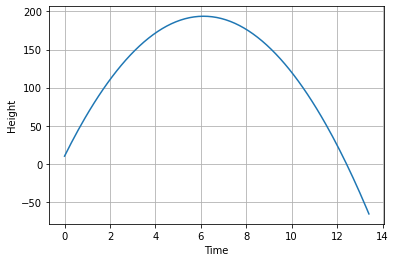

In [73]:
x = np.arange(0,13.5,0.1)
plt.plot(x,f(x))
plt.ylabel('Height')
plt.xlabel('Time')
plt.grid()
plt.show()

In [80]:
time_to_flight = bisection(12,14)

found root in [12.4091796875,12.41015625] xr = 12.40966796875
approxmate error = 0.003934684241589613


In [66]:
def max_interval(f,a,b,p):
    ep = (b-a)/10
    ea = 100
    es = 0.5 * 10**(2-p)
    px = b
    while ea > es:
        l = (a+b)/2 - ep/2
        u = (a+b)/2 + ep/2
        if f(l) > f(u):
            b = u
        else:
            a = l
        xmax = (a+b)/2
        ea = abs((xmax - px)/xmax) * 100
        px = xmax
    return xmax

In [78]:
max_hight = f(max_interval(f,5,7,4))

In [77]:
 time_to_reach_the_hightes_point = max_interval(f,5,7,4)

In [83]:
print('max hight = {}'.format(max_hight))
print('Time to reach the hightest point = {}'.format(time_to_reach_the_hightes_point))
print('Time of flight = {}'.format(time_to_flight))


max hight = 193.67346936935184
Time to reach the hightest point = 6.122387695312501
Time of flight = None


In [74]:
12.40966796875/2

6.204833984375

### 12. In order to run a school, the school has to pay fixed cost of 500,000 baht a month for electricity, water, Internet and building maintenance. The school also pays 40,000 baht per student per year for computing services, software licenses, paper, and class equipment. An instructor is also needed for every 20 students which a salary of 20,000 baht per month. How many students should be accepted for the school to break even in a year? If the tuition fee of a student is 70,000 baht 
**Since one instructor is needed for every 20 students, if there are more than 20 students, more than one instructors will be needed.**

student = ?

fixed_cost  = 500000 *12 #per year

equipment = 40000*student#per year

Instructor = 20000*12 #per year

fee_student = 70000 # per year?



In [55]:
# fee_student*2*student = fixed_cost + equipment + Instructor*(A instructor needs 20 students = student/20)
# (70000*2)*s = (500000*12) + (40000*s) + (20000*12)*(s/20)
# (140000*s) - (40000*s) - (20000*12)*(s/20) = 500000*12
# 88000*s = 6000000
s = 1
while(88000.0*s) <= 6000000:
    s+=1
print('School needs {} students'.format(s))

School needs 69.0 students


### 13.Write a python program to calculate the electricity bill 
based on the following calculation table (https://www.mea.or.th/en/profile/109/111). The input is the used energy by
customer, the output is the charge for each progression block. Test your work at
(https://www.mea.or.th/en/aboutelectric/116/280/form/11)

In [48]:
# ทศนิยมมันเพ้ียนๆ คิดแบบผสม(binocalculate) รุ้จักป่าว55555
useg = float(input('Customer used Energy: '))  #kw
Ft = -12.43 # s/kw
sum = 0
charge = (useg*Ft)/100 #bath
print('Customer used Energy           :   {:7.2f}    KWh/Month'.format(useg))
print('Ft                             :   {:7.2f}    Satang/KWh'.format(Ft))
print("======================================================")
if useg<=50:
    print('Free บ้านคุนพี่จุดเทียนหรอค่ะ')
    
else:
    print('Section 1 Base Tariff')
    print('First 15 kWh ( 1st – 15th)     :   {:7.2f}    Bath'.format(35.23))
    print('Next  10 kWh (16th – 15th)     :   {:7.2f}    Bath'.format(29.88))
    print('Next  10 kWh (26th – 35th)     :   {:7.2f}    Bath'.format(32.41))
    if useg>=36 and useg<100:
        sum = (useg-35)*3.6237+32.41+29.88+35.23
        print('Next  65 kWh (36th – 100th)    :   {:7.2f}    Bath'.format(sum))
    elif useg>=101 and useg<150:
        sum = 235.54
        print('Next  65 kWh (36th – 100th)    :    {:7.2f}   Bath'.format(sum))
        sum = (useg-100)*3.7171+235.54+32.41+29.88+35.23
        print('Next  50 kWh (101th – 150th)   :    {:7.2f}   Bath'.format(sum))
    elif useg>=151 and useg<400:
        sum = 235.54
        print('Next  65 kWh (36th – 100th)    :    {:7.2f}   Bath'.format(sum))
        sum = 185.86
        print('Next  50 kWh (101th – 150th)   :    {:7.2f}   Bath'.format(sum))
        sum = (useg-150)*4.2218+185.56+235.54+32.41+29.88+35.23
        print('Next  250 kWh (151th – 400th)  :   {:7.2f}   Bath'.format(sum))
    elif  useg>=401:
        sum = 235.54
        print('Next  65 kWh (36th – 100th)    :    {:7.2f}   Bath'.format(sum))
        sum = 185.86
        print('Next  50 kWh (101th – 150th)   :    {:7.2f}   Bath'.format(sum))
        sum = 1055.45
        print('Next  250 kWh (151th – 400th)  :   {:7.2f}   Bath'.format(sum))
        x = useg%400
        sum = (useg-400)*4.4217+1055.45+185.56+235.54+32.41+29.88+35.23
        print('Over  400 kWh (up from 401st)  :   {:7.2f}    Bath'.format((useg-400)*4.4217))
    
    print("======================================================")
    print('Total                          :   {:7.2f}    Bath'.format(sum))
    print('Service Charge                 :   {:7.2f}    Bath'.format(8.19))
    print()
    print('Total Base Tariff              :   {:7.2f}    Bath'.format(sum+8.19))
    print("======================================================")
    print('Section 2 [Ft] Charge')
    print('Used Energy x Ftrate           :   {:7.2f}    Bath'.format((useg*Ft)/100))
    print()
    print("======================================================")
    print('Section 3 Tax 7%')
    print('|Base Tariff + Ft| x 0.07      :   {:7.2f}    Bath'.format( (((sum+8.19)+(useg*Ft)/100))*0.07) )
    print()
    print('Total Electricity Charge       :   {:7.2f}    Bath'.format(+((sum+8.19) + ((useg*Ft)/100)) + (((sum+8.19)+(useg*Ft)/100))*0.07))
    print("======================================================")

Customer used Energy           :     10.00    KWh/Month
Ft                             :    -12.43    Satang/KWh
Free บ้านคุนพี่จุดเทียนหรอค่ะ


### 14.Write a program that calculates each monthly payment for a customer of a car dealer.
The program will accept the following inputs: car price, annual interest rate, number of
years for payment, down payment percentage (usually around 25% of car price), and
repayment amount (a fixed monthly payment usually around 20 – 50% of monthly
salary or around 2-5% of car price). The output will be the amount of principal left,
interest paid per month, and amount of principal paid per month. For example,
consider a car loan of 1 million baht with 3% interest rate per year with 25% down
payment and 15,000 baht fixed monthly repayment for 5 years. See example of loan
payment calculation here: https://www.savings.com.au/car-loans/how-is-interestcalculated 

In [49]:
#ไม่ทำแล้วจะไปการไฟฟ้า

In [84]:
def find_interested_rate_month(interest_rate, car_loan, n_year):
    interest = interest_rate/100*car_loan
    interest *= n_year/(n_year*12)
    return interest


def find_principle_paid(salary, repayment_amount):
    principle_paid = salary*(repayment_amount/100)
    return principle_paid


def find_principle_left(total_paid, paid_month, n_year):
    principle_left = total_paid-(paid_month*n_year8*12)
    return principle_left

In [95]:
paid_month = 1
n_year = 1
total_paid = 0

while(paid_month*n_year*12 > total_paid):
    car_price        = int(input('Input car price : '))
    interest_rate    = int(input('Input annual interested rate(%) : '))
    n_year           = int(input('Input number of year payment : '))
    down_payment     = int(input('Input down payment percentage(%) : '))
    repayment_amount = int(input('Input repayment amount in percentage(%) : '))
    salary           = int(input('Input your salary : '))
    down_money       = car_price*down/100
    car_loan         = car_price-down_money

    interest_paid = find_interested_rate_month(interest_rate, car_loan, n_year)

    paid_month = find_principle_paid(salary, repayment_amount)

    total_paid = car_loan+(interest_paid*n_year*12)

    prin_left = find_principle_left(total_paid, paid_month, n_year)
    print(paid_month*n_year*12, total_paid)

    if paid_month*n_year*12 > total_paid:
        print('Sorry your paid per month is over total price.\nPlease re-enter the information.')
print('Car price:                   {} Baht'.format(car_price))
print('Interested rate:             {} %'.format(interest_rate))
print('Number of year payment:      {} years'.format(n_year))
print('Down payment:                {} %'.format(down_payment))
print('Repayment amount:            {} %'.format(repayment_amount))
print('Your salary:                 {} Baht'.format(salary))
print()
print('interest paid per month :    {} Baht'.format(interest_paid))
print('Principle paid per month :   {} Baht'.format(paid_month))
print('Principle left :             {} Baht'.format(prin_left))

300000.0 733125.0
Car price:                   850000 Baht
Interested rate:             3 %
Number of year payment:      5 years
Down payment:                30 %
Repayment amount:            10 %
Your salary:                 50000 Baht

interest paid per month :    1593.75 Baht
Principle paid per month :   5000.0 Baht
Principle left :             433125.0 Baht
